# Toolkit

In [1]:
import pandas as pd

# Import and Inspect Data

In [2]:
df = pd.read_csv(r'Data/train.csv')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


# Preprocessing

### Duplicates

In [4]:
df.duplicated().sum()

0

### Nulls

In [5]:
(df.isnull().sum()/df.shape[0])*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [6]:
# more than 80%
df.drop('New_Price', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
# others are less than 1% so drop
df.dropna(axis=0, inplace=True)

In [8]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [10]:
df["Name"].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [11]:
# Name isn't important, extract brand from it
df["Brand"] = df["Name"].apply(lambda x: x.split()[0])

In [12]:
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 653.5+ KB


In [14]:
df["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [15]:
df["Year"].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [16]:
df["Kilometers_Driven"].unique()

array([72000, 41000, 46000, ..., 45004, 70602, 27365], dtype=int64)

In [17]:
df["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [18]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [19]:
df["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [20]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [21]:
# extract numeric
df["Mileage"] = df["Mileage"].apply(lambda x: x.split()[0]).astype(float)

In [22]:
df["Mileage"].unique()

array([26.6 , 19.67, 18.2 , 20.77, 15.2 , 21.1 , 23.08, 11.36, 20.54,
       22.3 , 21.56, 16.8 , 25.2 , 12.7 ,  0.  , 13.5 , 25.8 , 28.4 ,
       20.45, 14.84, 22.69, 23.65, 13.53, 18.5 , 14.4 , 20.92, 17.5 ,
       12.8 , 19.01, 14.53, 11.18, 12.4 , 16.09, 14.  , 24.3 , 18.15,
       11.74, 22.07, 19.7 , 25.4 , 25.32, 14.62, 14.28, 14.9 , 11.25,
       24.4 , 16.55, 17.11, 22.9 , 17.8 , 18.9 , 15.04, 25.17, 20.36,
       13.29, 13.68, 20.  , 15.8 , 25.  , 16.4 , 24.52, 22.1 ,  8.5 ,
       15.1 , 16.95, 19.64, 16.5 , 18.53, 17.57, 18.  , 23.2 , 16.73,
       17.  , 13.  , 17.68, 22.7 , 16.2 , 15.26, 23.  , 19.83, 14.94,
       17.71, 14.74, 16.  , 22.32, 12.99, 23.3 , 19.15, 10.8 , 15.  ,
       22.  , 21.9 , 12.05, 11.7 , 21.21, 20.73, 24.07, 19.  , 20.58,
       19.27, 11.5 , 18.6 , 21.14, 11.05, 21.76,  7.81, 21.66, 17.2 ,
       20.63, 19.4 , 14.8 , 26.  , 20.4 , 21.5 , 15.3 , 17.9 , 16.6 ,
       22.54, 25.44, 13.7 , 22.48, 12.9 , 19.98, 21.4 , 19.81, 15.4 ,
       25.47, 19.87,

In [23]:
df.Engine.unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', '1896 CC',
       '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC', '1405 CC',
       '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC', '2400 CC',
       '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC', '1395 CC',
       '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368 CC',

In [24]:
# Extract numeric value from it 
df["Engine"] = df["Engine"].apply(lambda x: x.split()[0]).astype(int)

In [25]:
df.Engine.unique()

array([ 998, 1582, 1199, 1248, 1968,  814, 1461, 2755, 1598, 1462, 1497,
       2179, 2477, 1498, 2143, 1995, 1984, 1197, 2494, 1798, 2696, 2698,
       1061, 1198, 2987,  796,  624, 1999, 1991, 2694, 1120, 2498,  799,
       2393, 1399, 1796, 2148, 1396, 1950, 4806, 1998, 1086, 1193, 2982,
       1493, 2967, 2993, 1196, 1799, 2497, 2354, 1373, 2996, 1591, 2894,
       5461, 1595,  936, 1997, 1896, 1390, 1364, 2199,  993,  999, 1405,
       2956, 1794,  995, 2496, 1599, 2400, 1495, 2523,  793, 4134, 1596,
       1395, 2953, 1586, 2362, 1496, 1368, 1298, 1956, 1299, 3498, 2835,
       1150, 3198, 1343, 1499, 1186, 1590, 2609, 2499, 2446, 1978, 2360,
       3436, 2198, 4367, 2706, 1422, 2979, 1969, 1489, 2489, 1242, 1388,
       1172, 2495, 1194, 3200, 1781, 1341, 2773, 3597, 1985, 2147, 1047,
       2999, 2995, 2997, 1948, 2359, 4395, 2349, 2720, 1468, 3197, 2487,
       1597, 2771, 4951,  970, 2925, 2200, 5000, 2149, 5998, 2092, 5204,
       2112, 1797])

In [26]:
df.Power.unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [27]:
# Extract numeric value from it 
df["Power"] = df["Power"].apply(lambda x: x.split()[0])

In [28]:
df["Power"] = pd.to_numeric(df['Power'], errors='coerce')

In [29]:
df["Power"].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,     nan, 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

In [30]:
(df["Power"].isna().sum()/df.shape[0])*100

1.7238493723849373

In [31]:
# less than 10%
df.dropna(axis=0, inplace=True)

In [32]:
df["Seats"].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.])

In [33]:
# cast to int
df["Seats"] = df["Seats"].astype(int)

In [34]:
list(df["Price"].unique())

[1.75,
 12.5,
 4.5,
 6.0,
 17.74,
 2.35,
 3.5,
 17.5,
 5.2,
 1.95,
 9.95,
 4.49,
 5.6,
 27.0,
 15.0,
 5.4,
 5.99,
 6.34,
 28.0,
 18.55,
 8.25,
 23.5,
 1.87,
 2.85,
 4.25,
 2.75,
 9.9,
 4.0,
 7.75,
 6.75,
 11.5,
 6.98,
 1.85,
 8.63,
 4.85,
 5.0,
 1.25,
 1.53,
 5.58,
 4.74,
 8.85,
 10.11,
 10.95,
 3.85,
 5.5,
 21.43,
 3.3,
 3.6,
 3.99,
 2.07,
 2.25,
 16.5,
 26.7,
 10.0,
 2.5,
 13.5,
 35.67,
 8.15,
 10.5,
 14.5,
 9.65,
 3.48,
 6.92,
 6.46,
 29.5,
 11.75,
 3.75,
 4.82,
 2.8,
 3.11,
 3.25,
 13.9,
 5.75,
 39.58,
 8.1,
 2.79,
 3.45,
 4.45,
 2.65,
 3.8,
 4.65,
 3.95,
 9.8,
 2.7,
 2.41,
 3.9,
 24.0,
 5.25,
 19.25,
 3.91,
 2.15,
 20.75,
 3.35,
 11.11,
 20.0,
 6.55,
 7.0,
 7.5,
 16.75,
 2.45,
 3.23,
 9.35,
 7.25,
 7.47,
 13.25,
 5.81,
 2.6,
 54.0,
 1.6,
 17.22,
 17.95,
 3.7,
 5.43,
 13.49,
 4.75,
 37.0,
 26.5,
 23.32,
 6.25,
 30.0,
 9.86,
 8.5,
 4.23,
 2.39,
 11.25,
 7.11,
 10.9,
 6.2,
 7.9,
 4.42,
 2.1,
 45.0,
 33.66,
 3.65,
 42.5,
 6.5,
 19.0,
 23.0,
 8.35,
 22.95,
 1.5,
 6.89,
 1.45,
 33.5,
 4

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int32  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   int32  
 11  Price              5872 non-null   float64
 12  Brand              5872 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(6)
memory usage: 596.4+ KB


In [36]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi


In [38]:
# df.name = df.name.apply(lambda x:" ".join(x.split()[:2]))
# df[['name','brand']]

In [39]:
df.to_csv('Data/cleaned_used_cars_price.csv')

## Outliers

<Axes: >

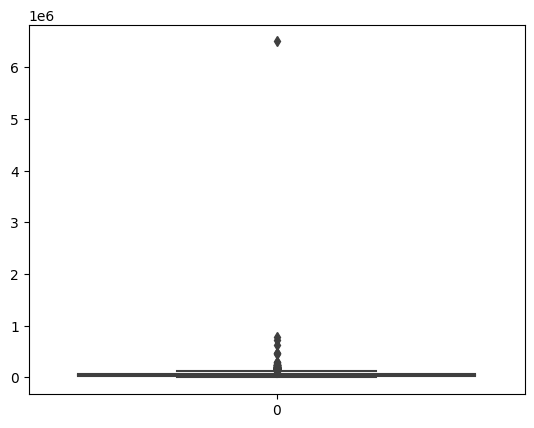

In [48]:
sns.boxplot(data=df["Kilometers_Driven"])

In [58]:
df["Kilometers_Driven"].sort_values(ascending=False)

2269    6500000
327      775000
1813     720000
345      620000
3010     480000
         ...   
1209       1000
2004       1000
5206       1000
5468        600
1323        171
Name: Kilometers_Driven, Length: 5872, dtype: int64

In [59]:
# drop 6500000
df.drop(index=2269, inplace=True)

<Axes: >

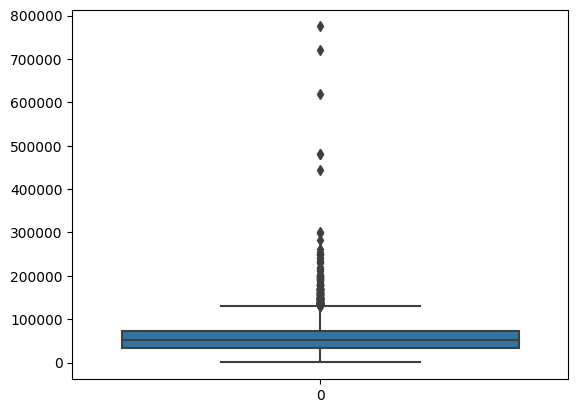

In [64]:
sns.boxplot(data=df["Kilometers_Driven"])

In [65]:
df[df["Kilometers_Driven"] > 300000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
327,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968,141.00,5,7.50,Skoda
345,Chennai,2009,620000,Petrol,Manual,First,20.36,1197,78.90,5,2.70,Hyundai
1813,Chennai,2013,720000,Diesel,Manual,First,20.54,1598,103.60,5,5.90,Volkswagen
2745,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968,138.03,5,13.00,Volkswagen
3010,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497,117.30,5,5.00,Honda
4378,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197,82.90,5,4.45,Hyundai


In [71]:
kilos_indices = detect_outliers(df, 0, ["Kilometers_Driven"])
(len(kilos_indices)/df.shape[0])*100

3.372508942258559

In [72]:
df.drop(kilos_indices, axis=0, inplace=True)

<Axes: >

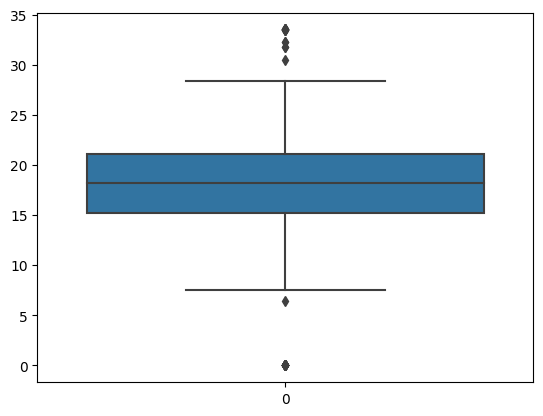

In [49]:
sns.boxplot(data=df["Mileage"])

In [76]:
mileage_indeces = detect_outliers(df, 0, ["Mileage"])
(len(mileage_indeces)/df.shape[0])*100

0.74034902168165

In [77]:
df.drop(mileage_indeces, axis=0, inplace=True)

<Axes: >

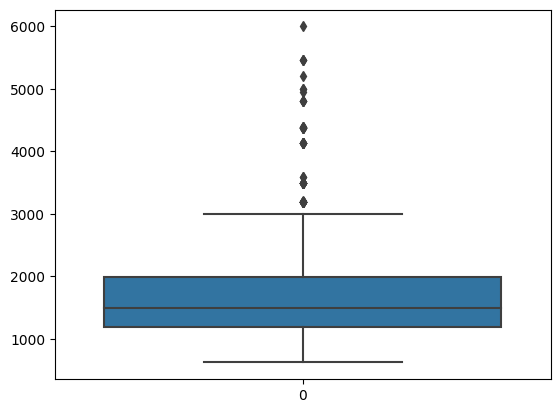

In [50]:
sns.boxplot(data=df["Engine"])

In [78]:
engine_indeces = detect_outliers(df, 0, ["Engine"])
(len(engine_indeces)/df.shape[0])*100

0.9589770911028237

In [79]:
df.drop(engine_indeces, axis=0, inplace=True)

<Axes: >

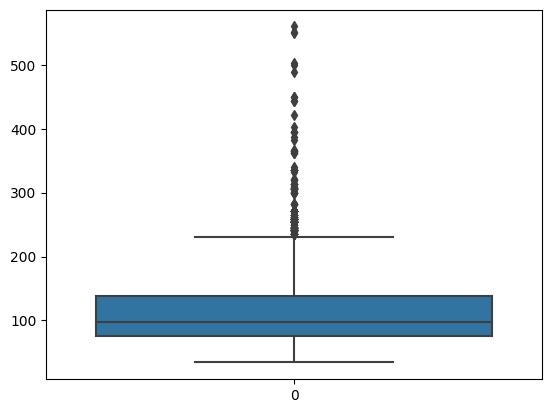

In [51]:
sns.boxplot(data=df["Power"])

In [80]:
power_indeces = detect_outliers(df, 0, ["Power"])
(len(power_indeces)/df.shape[0])*100

3.442711135018827

In [81]:
# Calculate the 95th percentile of the Power column
percentile_95 = df["Power"].quantile(0.95)

# Replace values above the 95th percentile with the 95th percentile value
df["Power"] = df["Power"].apply(lambda x: percentile_95 if x > percentile_95 else x)


<Axes: >

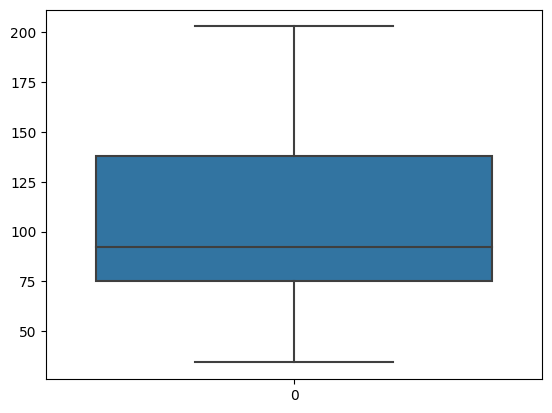

In [82]:
sns.boxplot(data=df["Power"])

<Axes: >

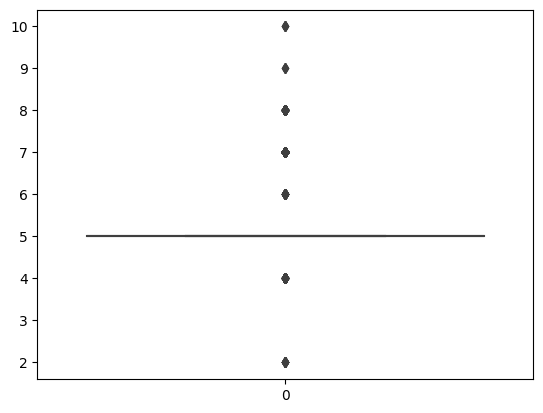

In [52]:
sns.boxplot(data=df["Seats"])

In [89]:
df["Seats"].value_counts()

5     4757
7      588
8      108
4       83
6       27
2        7
10       4
9        2
Name: Seats, dtype: int64

<Axes: >

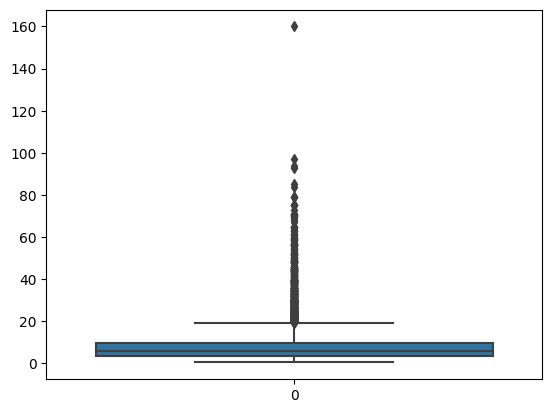

In [83]:
sns.boxplot(data=df["Price"])

In [84]:
df["Price"].sort_values(ascending=False)

3972    160.00
1463     97.07
1926     93.67
1936     93.00
5397     85.00
         ...  
3144      0.50
3055      0.45
1584      0.45
2768      0.45
1667      0.44
Name: Price, Length: 5577, dtype: float64

In [85]:
df.drop(3972, axis=0, inplace=True)

<Axes: >

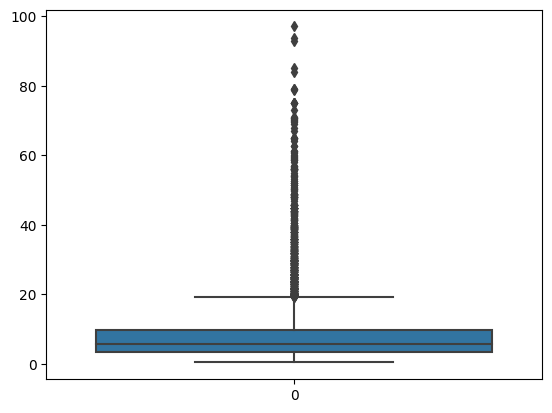

In [87]:
sns.boxplot(data=df["Price"])

In [91]:
df[df["Price"] > 20].sort_values(by="Price", ascending=False)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
1463,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993,203.00,5,97.07,Land
1926,Coimbatore,2018,28060,Petrol,Automatic,First,12.05,2979,203.00,5,93.67,BMW
1936,Bangalore,2017,17465,Petrol,Automatic,First,12.05,2979,203.00,5,93.00,BMW
5397,Ahmedabad,2015,97003,Diesel,Automatic,First,15.87,2993,203.00,5,85.00,BMW
2044,Coimbatore,2019,2526,Petrol,Automatic,First,19.00,2996,203.00,2,83.96,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...,...
287,Chennai,2016,48000,Diesel,Manual,First,13.68,2393,147.80,7,20.25,Toyota
2499,Coimbatore,2017,65367,Diesel,Automatic,First,11.36,2755,171.50,7,20.14,Toyota
1866,Kochi,2014,62012,Diesel,Automatic,First,17.68,1968,174.33,5,20.12,Audi
5393,Kochi,2014,59885,Diesel,Automatic,First,12.39,2179,147.51,5,20.11,Land


In [93]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Identify and handle outliers using k-NN
def handle_outliers_knn(data, column_name, k=5, threshold=3):
    # Extract the column with outliers
    column = data[column_name].values.reshape(-1, 1)

    # Fit a k-NN model
    nbrs = NearestNeighbors(n_neighbors=k).fit(column)

    # Calculate distances and indices of k nearest neighbors
    distances, indices = nbrs.kneighbors(column)

    # Calculate the mean distance for each data point
    mean_distances = np.mean(distances, axis=1)

    # Identify outliers based on mean distance and threshold
    outlier_indices = np.where(mean_distances > threshold)[0]

    # Handle outliers (e.g., replace with the median of k nearest neighbors)
    for idx in outlier_indices:
        neighbors = indices[idx][1:]  # Exclude the data point itself
        median_neighbor_value = np.median(column[neighbors])
        data.at[idx, column_name] = median_neighbor_value

    return data

# Apply the outlier handling function to the 'Power' column
df_handled = handle_outliers_knn(df, "Power", k=5, threshold=3)

# Now df_handled contains the DataFrame with outliers handled using k-NN


<Axes: >

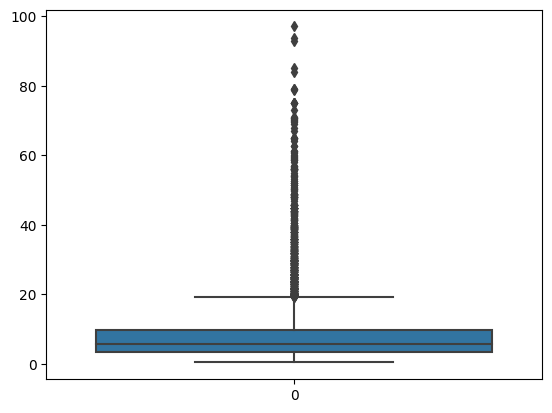

In [94]:
sns.boxplot(data=df["Price"])

In [54]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [39]:
idx = detect_outliers(df,0,num_cols)

In [40]:
len(idx)/df.shape[0]

0.2775885558583106

In [41]:
nonout_df=df[~df.index.isin(idx)]

In [42]:
df[df.index.isin(idx)]

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,brand
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti
7,Toyota Innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8,17.50,Toyota
13,Land Rover,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179,187.70,5,27.00,Land
14,Land Rover,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179,115.00,5,17.50,Land
15,Mitsubishi Pajero,Delhi,2014,110000,Diesel,Manual,First,13.50,2477,175.56,7,15.00,Mitsubishi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Porsche Panamera,Hyderabad,2013,40000,Diesel,Automatic,Second,17.85,2967,300.00,4,45.00,Porsche
5862,Toyota Camry,Mumbai,2015,33500,Petrol,Automatic,First,19.16,2494,158.20,5,19.75,Toyota
5864,Skoda Superb,Hyderabad,2009,53000,Petrol,Automatic,First,0.00,3597,262.60,5,4.75,Skoda
5865,Toyota Innova,Coimbatore,2011,45004,Diesel,Manual,First,12.80,2494,102.00,7,9.48,Toyota


In [43]:
for col in num_cols:
    df.loc[df.index.isin(idx),col]=nonout_df[col].mean()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5872 non-null   object 
 1   location           5872 non-null   object 
 2   year               5872 non-null   int64  
 3   kilometers_driven  5872 non-null   float64
 4   fuel_type          5872 non-null   object 
 5   transmission       5872 non-null   object 
 6   owner_type         5872 non-null   object 
 7   mileage            5872 non-null   float64
 8   engine             5872 non-null   float64
 9   power              5872 non-null   float64
 10  seats              5872 non-null   int64  
 11  price              5872 non-null   float64
 12  brand              5872 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 596.5+ KB


In [45]:
df.columns

Index(['name', 'location', 'year', 'kilometers_driven', 'fuel_type',
       'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats',
       'price', 'brand'],
      dtype='object')

<Axes: xlabel='price', ylabel='location'>

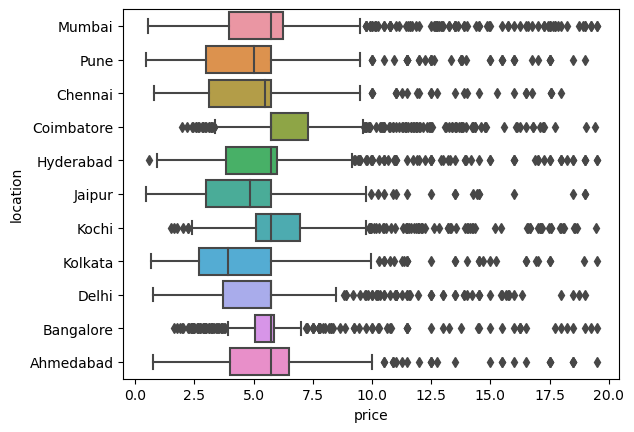

In [46]:
sns.boxplot(y='location',x='price',data=df)

<Axes: xlabel='price', ylabel='year'>

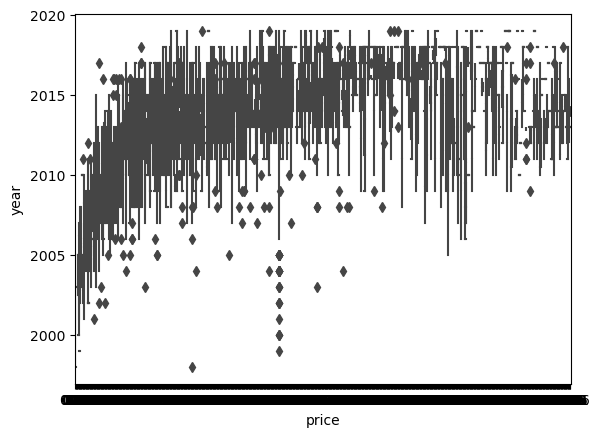

In [47]:
sns.boxplot(y=df.year,x=df.price)

In [59]:
df.columns

Index(['year', 'kilometers_driven', 'owner_type', 'mileage', 'engine', 'power',
       'seats', 'price', 'location_Bangalore', 'location_Chennai',
       'location_Coimbatore', 'location_Delhi', 'location_Hyderabad',
       'location_Jaipur', 'location_Kochi', 'location_Kolkata',
       'location_Mumbai', 'location_Pune', 'fuel_type_Diesel', 'fuel_type_LPG',
       'fuel_type_Petrol', 'transmission_Manual', 'brand_Audi', 'brand_BMW',
       'brand_Bentley', 'brand_Chevrolet', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_ISUZU', 'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep',
       'brand_Lamborghini', 'brand_Land', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mini', 'brand_Mitsubishi', 'brand_Nissan',
       'brand_Porsche', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

In [66]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [67]:
model_lr.score(x_train,y_train)

0.6944858377644659

In [68]:
model_lr.score(x_test,y_test)

0.6832232881765267

## KNN

In [71]:
model_knn.score(x_train,y_train)

0.9139341816414561

In [72]:
model_knn.score(x_test,y_test)

0.8251655487676345

## `Save model`

In [73]:
joblib.dump(model_knn,'model_knn.h5')

['model_knn.h5']

In [74]:
joblib.dump(scaler,'scaler.h5')

['scaler.h5']

In [77]:
features=list(x.columns)

In [78]:
joblib.dump(features,'features.h5')

['features.h5']